In [4]:
BFA1DataSet = pd.read_csv(
            "Enter your dataset path",
            thousands = ',',
            encoding = 'euc-kr')

df = pd.DataFrame(BFA1DataSet)
df = df.dropna()
df

,barcode_lineCode,barcode_processCode,barcode_hogi,barcode_partNo,barcode_pcbBarcode,barcode_jigBarcode,barcode_markingData,barcode_status,barcode_inspDate,LVDT_lineCode,...,IR_4_2_Result,IFT_lineCode,IFT_processCode,IFT_hogi,IFT_seriesNo,IFT_barcodeName,IFT_barcode,IFT_inspDate,IFT_inspTime,IFT_result
0,B1,Barcode,1,21-22102-001,HTE1P2210101533,VOL3P10027,MFR01089AB;2201030108V,OK,2022-01-03 00:49:15,B1,...,SKIP,B1,IFT,1,133,VOLVO_CMA_3P_4S,MFR01089AB;2201030108V,2022-01-03,01:15:09,P
1,B1,Barcode,1,21-22102-001,HTE1P2210101625,VOL3P10042,MFR01089AB;2201030112V,OK,2022-01-03 00:50:01,B1,...,SKIP,B1,IFT,1,134,VOLVO_CMA_3P_4S,MFR01089AB;2201030112V,2022-01-03,01:15:40,P
2,B1,Barcode,1,21-22102-001,HTE1P2210105493,VOL3P10012,MFR01089AB;2201030033V,OK,2022-01-03 00:08:47,B1,...,SKIP,B1,IFT,1,135,VOLVO_CMA_3P_4S,MFR01089AB;2201030033V,2022-01-03,01:16:07,P
3,B1,Barcode,1,21-22102-001,HTE1P2210100909,VOL3P10029,MFR01089AB;2201030113V,OK,2022-01-03 00:50:15,B1,...,SKIP,B1,IFT,1,136,VOLVO_CMA_3P_4S,MFR01089AB;2201030113V,2022-01-03,01:16:36,P
4,B1,Barcode,1,21-22102-001,HTE1P2210101549,VOL3P10038,MFR01089AB;2201030116V,OK,2022-01-03 00:51:01,B1,...,SKIP,B1,IFT,1,137,VOLVO_CMA_3P_4S,MFR01089AB;2201030116V,2022-01-03,01:17:04,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21973,B1,Barcode,1,21-22115-001,HTE1P2211109826,VOL3P10023,MFR01089AB;2201157306V,OK,2022-01-15 23:50:58,B1,...,SKIP,B1,IFT,1,35,VOLVO_CMA_3P_4S,MFR01089AB;2201157306V,2022-01-16,00:41:13,P
21974,B1,Barcode,1,21-22115-001,HTE1P2211109834,VOL3P10012,MFR01089AB;2201157307V,OK,2022-01-15 23:51:12,B1,...,SKIP,B1,IFT,1,36,VOLVO_CMA_3P_4S,MFR01089AB;2201157307V,2022-01-16,00:41:41,P
21975,B1,Barcode,1,21-22115-001,HTE1P2211109899,VOL3P10006,MFR01089AB;2201157312V,OK,2022-01-15 23:52:14,B1,...,SKIP,B1,IFT,1,37,VOLVO_CMA_3P_4S,MFR01089AB;2201157312V,2022-01-16,00:42:08,P
21976,B1,Barcode,1,21-22115-001,HTE1P2211109577,VOL3P10040,MFR01089AB;2201160001V,OK,2022-01-15 23:52:28,B1,...,SKIP,B1,IFT,1,38,VOLVO_CMA_3P_4S,MFR01089AB;2201160001V,2022-01-16,00:42:35,P


In [5]:
df.describe()
df.columns
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21978 entries, 0 to 21977
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   barcode_lineCode            21978 non-null  object
 1   barcode_processCode         21978 non-null  object
 2   barcode_hogi                21978 non-null  int64 
 3   barcode_partNo              21978 non-null  object
 4   barcode_pcbBarcode          21978 non-null  object
 5   barcode_jigBarcode          21978 non-null  object
 6   barcode_markingData         21978 non-null  object
 7   barcode_status              21978 non-null  object
 8   barcode_inspDate            21978 non-null  object
 9   LVDT_lineCode               21978 non-null  object
 10  LVDT_processCode            21978 non-null  object
 11  LVDT_hogi                   21978 non-null  int64 
 12  LVDT_barcode                21978 non-null  object
 13  LVDT_status                 21978 non-null  ob

(21978, 62)

In [11]:
df['IR_2_1_Result'].value_counts()

P    21978
Name: IR_2_1_Result, dtype: int64

In [3]:
%matplotlib inline
import matplotlib
# matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt
import numpy as np
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import seaborn as sns
from IPython.display import Image
import pydotplus
import pandas as pd
import os

In [8]:
dfResult = df.groupby('IFT_result').IFT_hogi.sum()
dfResult

IFT_result
F      115
P    21863
Name: IFT_hogi, dtype: int64

([<matplotlib.axis.XTick at 0x18313c57160>,
 [Text(0, 0, 'FAIL'), Text(1, 0, 'PASS')])

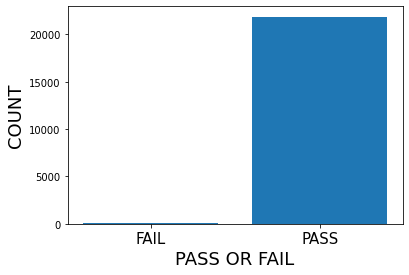

In [35]:
label = ['FAIL', 'PASS']
index = np.arange(len(label))
plt.bar(index, dfResult)
plt.title('', fontsize=20)
plt.xlabel('PASS OR FAIL', fontsize=18)
plt.ylabel('COUNT', fontsize=18)
plt.xticks(index, label, fontsize=15)

In [26]:
tempArray = df['IR_2_2_Volt_resMeasure'].str.split(',').str[0]

for i in range(len(tempArray)) :
    tempArray[i] = float(tempArray[i].replace('[kV]', ''))

tempArray2 = df['IR_2_2_Volt_resMeasure'].str.split(',').str[1]

for i in range(len(tempArray2)) :
    tempArray2[i] = float(tempArray2[i].replace('[Ω]', ''))
    
tempArray3 = df['HIPOT_voltage'].str.split(',').str[0]

for i in range(len(tempArray3)) :
    tempArray3[i] = float(tempArray3[i].replace('[kV]', ''))
    
tempArray4 = df['HIPOT_voltage'].str.split(',').str[1]

for i in range(len(tempArray4)) :
    tempArray4[i] = float(tempArray4[i].replace('[mA]', ''))

df['IR_volt'] = tempArray
df['IR_resMeasure'] = tempArray2
df['HIPOT_kV'] = tempArray3
df['HIPOT_mA'] = tempArray4

df

,barcode_lineCode,barcode_processCode,barcode_hogi,barcode_partNo,barcode_pcbBarcode,barcode_jigBarcode,barcode_markingData,barcode_status,barcode_inspDate,LVDT_lineCode,...,IFT_seriesNo,IFT_barcodeName,IFT_barcode,IFT_inspDate,IFT_inspTime,IFT_result,IR_volt,IR_resMeasure,HIPOT_kV,HIPOT_mA
0,B1,Barcode,1,21-22102-001,HTE1P2210101533,VOL3P10027,MFR01089AB;2201030108V,OK,2022-01-03 00:49:15,B1,...,133,VOLVO_CMA_3P_4S,MFR01089AB;2201030108V,2022-01-03,01:15:09,P,0.502,48580000000.0,3.351,0.0
1,B1,Barcode,1,21-22102-001,HTE1P2210101625,VOL3P10042,MFR01089AB;2201030112V,OK,2022-01-03 00:50:01,B1,...,134,VOLVO_CMA_3P_4S,MFR01089AB;2201030112V,2022-01-03,01:15:40,P,0.5,50850000000.0,3.351,0.0
2,B1,Barcode,1,21-22102-001,HTE1P2210105493,VOL3P10012,MFR01089AB;2201030033V,OK,2022-01-03 00:08:47,B1,...,135,VOLVO_CMA_3P_4S,MFR01089AB;2201030033V,2022-01-03,01:16:07,P,0.5,52630000000.0,3.356,0.0
3,B1,Barcode,1,21-22102-001,HTE1P2210100909,VOL3P10029,MFR01089AB;2201030113V,OK,2022-01-03 00:50:15,B1,...,136,VOLVO_CMA_3P_4S,MFR01089AB;2201030113V,2022-01-03,01:16:36,P,0.502,48580000000.0,3.354,0.0
4,B1,Barcode,1,21-22102-001,HTE1P2210101549,VOL3P10038,MFR01089AB;2201030116V,OK,2022-01-03 00:51:01,B1,...,137,VOLVO_CMA_3P_4S,MFR01089AB;2201030116V,2022-01-03,01:17:04,P,0.502,51930000000.0,3.356,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21973,B1,Barcode,1,21-22115-001,HTE1P2211109826,VOL3P10023,MFR01089AB;2201157306V,OK,2022-01-15 23:50:58,B1,...,35,VOLVO_CMA_3P_4S,MFR01089AB;2201157306V,2022-01-16,00:41:13,P,0.502,45640000000.0,3.356,0.0
21974,B1,Barcode,1,21-22115-001,HTE1P2211109834,VOL3P10012,MFR01089AB;2201157307V,OK,2022-01-15 23:51:12,B1,...,36,VOLVO_CMA_3P_4S,MFR01089AB;2201157307V,2022-01-16,00:41:41,P,0.5,47620000000.0,3.351,0.0
21975,B1,Barcode,1,21-22115-001,HTE1P2211109899,VOL3P10006,MFR01089AB;2201157312V,OK,2022-01-15 23:52:14,B1,...,37,VOLVO_CMA_3P_4S,MFR01089AB;2201157312V,2022-01-16,00:42:08,P,0.502,41830000000.0,3.353,0.0
21976,B1,Barcode,1,21-22115-001,HTE1P2211109577,VOL3P10040,MFR01089AB;2201160001V,OK,2022-01-15 23:52:28,B1,...,38,VOLVO_CMA_3P_4S,MFR01089AB;2201160001V,2022-01-16,00:42:35,P,0.5,41100000000.0,3.356,0.0


In [143]:
df['idx.1'].isnull().sum()

0

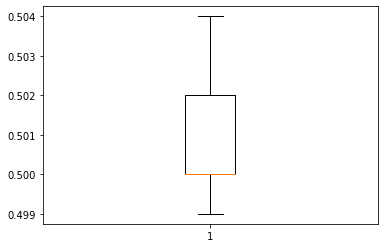

In [32]:
plt.boxplot(df['IR_volt'])
plt.show()

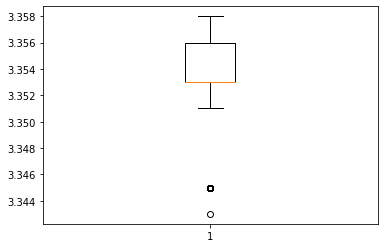

In [33]:
plt.boxplot(df['HIPOT_kV'])
plt.show()